In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
#import modules and libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import data files as pandas dataframe

df_train = pd.read_csv('/kaggle/input/titanic/train.csv') # read train file
df_test = pd.read_csv('/kaggle/input/titanic/test.csv') # read test file

In [155]:

real_train = pd.read_csv('/kaggle/input/titanic/train.csv') # read train file
real_test = pd.read_csv('/kaggle/input/titanic/test.csv') # read test file

In [10]:
#check dimensionality

print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


There are 891 rows and 12 columns in the train dataset. <br /> 
The test data has one column less from the training data. <br /> 
It does not have the 'Survived' column.

In [5]:
#create a combined dataset to be used later if needed

# make a copy of each dataframe
df_train_2 = df_train.copy()
df_test_2 = df_test.copy()

# add a column each to identify whether a row comes from train data or not
df_train_2['is_train'] = 1 
df_test_2['is_train'] = 0

# Drop 'Survived' from train data
df_train_2 = df_train_2.drop('Survived', axis=1)

# combine dataset
full_data = pd.concat([df_train_2, df_test_2], axis=0, ignore_index=True)

# make a copy of full data
df_full = full_data.copy()


In [50]:
#view dataframes 

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# # **Supervised Learning**

### Exploratory Data Analysis

In [52]:
#information about the data

print(df_train.info())
print('\n')
print(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1  

### Data description as given
survival -> Survival	0 = No, 1 = Yes <br />
pclass	-> Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	-> Sex	
Age	-> Age in years	
sibsp ->	# of siblings / spouses aboard the Titanic	
parch	-> # of parents / children aboard the Titanic	
ticket	-> Ticket number	
fare	-> Passenger fare	
cabin	-> Cabin number	
embarked  -> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [53]:
#check unique values for each feature 

print(df_train.nunique())
print('\n')
print(df_full.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
is_train          2
dtype: int64


'Survived', 'Pclass', 'Sex', and 'Embarked' are important categorical features <br />
'Parch' and 'SibSp' although dicrete, are not categorical because of what they represent as written in the data description
'Parch', 'Age', 'Fare' has extra variables different from in the training data

#### Data categories in this set <br />
 Survived -> nominal <br />
 Sex      ->  nominal <br />
 Embarked  ->  nominal <br />
 Name     ->    nominal <br />
 Cabin     ->   nominal <br />
 Ticket    ->   nominal <br />
 Pclass   ->    ordinal (1st class is different from 2nd class) <br />
 Age      ->   continuous <br />
 Fare    ->    continuous  (monetary value) <br />
 PassengerId  ->  discrete  <br />
 SibSp   ->    discrete  <br />
 Parch   ->   discrete <br /> <br />
 
 Nominal - categorical with no quantitative value <br />
 Ordinal - categorical with quantitative value <br />
 Continuous - numerical and measurable  <br />
 Discrete - numerical and can be counted  <br />
 Quantitative - numerical  <br />

In [54]:
#check number of missing values

print(df_train.isnull().sum())
print('\n')
print(df_full.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_train          0
dtype: int64


In [62]:
#calculate missing values in percentage

print(df_train.isnull().sum() / df_train.isnull().count())
print('\n')
print(df_full.isnull().sum() / df_full.isnull().count())

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64


Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.200917
SibSp       0.000000
Parch       0.000000
Fare        0.000764
Embarked    0.001528
is_train    0.000000
dtype: float64


'Cabin' has approximately 77% missing values in both the training and full data frames. <br /> 
This would not provide enough information for any analysis. This column would be dropped. <br /> 
I would handle the missing values for Age later

In [88]:
#check if NaN cabins are equal to a particular Pclass
df_train[df_train.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
885,886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,1
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [96]:
df_train[(df_train.isnull().any(axis=1)) & (df_train['Pclass'] == 1)] #check if there are Pclass 1 for Cabin NaN

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,1
35,36,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,1
55,56,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,1
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,1
64,65,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C,1
83,84,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S,1
155,156,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,1
166,167,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S,1


In [56]:
#check for duplicated data

print(df_train.duplicated().any())
print('\n')
print(df_full.duplicated().any())

False


False


In [6]:
#drop columns

# I will be dropping all the columns identified for elimination during the exploratory journey

df_train = df_train.drop(['Cabin', 'PassengerId'], axis=1)
df_full = df_full.drop(['Cabin', 'PassengerId'], axis=1)

In [58]:
print(df_train.shape)
print(df_full.shape)

(891, 9)
(1309, 9)


In [7]:
#split numerical and categorical features for easier visualisation

df_train_num = df_train[['Age', 'Fare', 'Parch','SibSp']].copy()
df_train_cat = df_train[['Survived', 'Sex', 'Pclass', 'Embarked', 'Ticket']].copy()
df_full_num = df_full[['Age', 'Fare','Parch','SibSp']].copy()
df_full_cat = df_full[['Pclass', 'Sex', 'Embarked', 'Ticket', 'is_train']].copy()

In [60]:
#perform 5-summary statistical analysis

print(df_train_num.describe())
print('\n')
print(df_full_num.describe())

              Age        Fare       Parch       SibSp
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118   32.204208    0.381594    0.523008
std     14.526497   49.693429    0.806057    1.102743
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     38.000000   31.000000    0.000000    1.000000
max     80.000000  512.329200    6.000000    8.000000


               Age         Fare        Parch        SibSp
count  1046.000000  1308.000000  1309.000000  1309.000000
mean     29.881138    33.295479     0.385027     0.498854
std      14.413493    51.758668     0.865560     1.041658
min       0.170000     0.000000     0.000000     0.000000
25%      21.000000     7.895800     0.000000     0.000000
50%      28.000000    14.454200     0.000000     0.000000
75%      39.000000    31.275000     0.000000     1.000000
max      80.000000   512.329200     9.000000    

There are no unusual outliers in age as the max age is 80. <br />
There were definitely infants onboard, from the min age <br /> <br />
Fares that are 0 are most likely the crew. <br /> <br />
There are many people with the third class tickets as indicated by the median. <br />
The first class tickets looks like they were quite expensive. People with these tickets must have been affluent. <br /><br />
The maximum number of related parents and children was 9, and for siblings and spouses, 8 <br />
There are definitely no invalid data


### Deeper Analysis and Visualisations

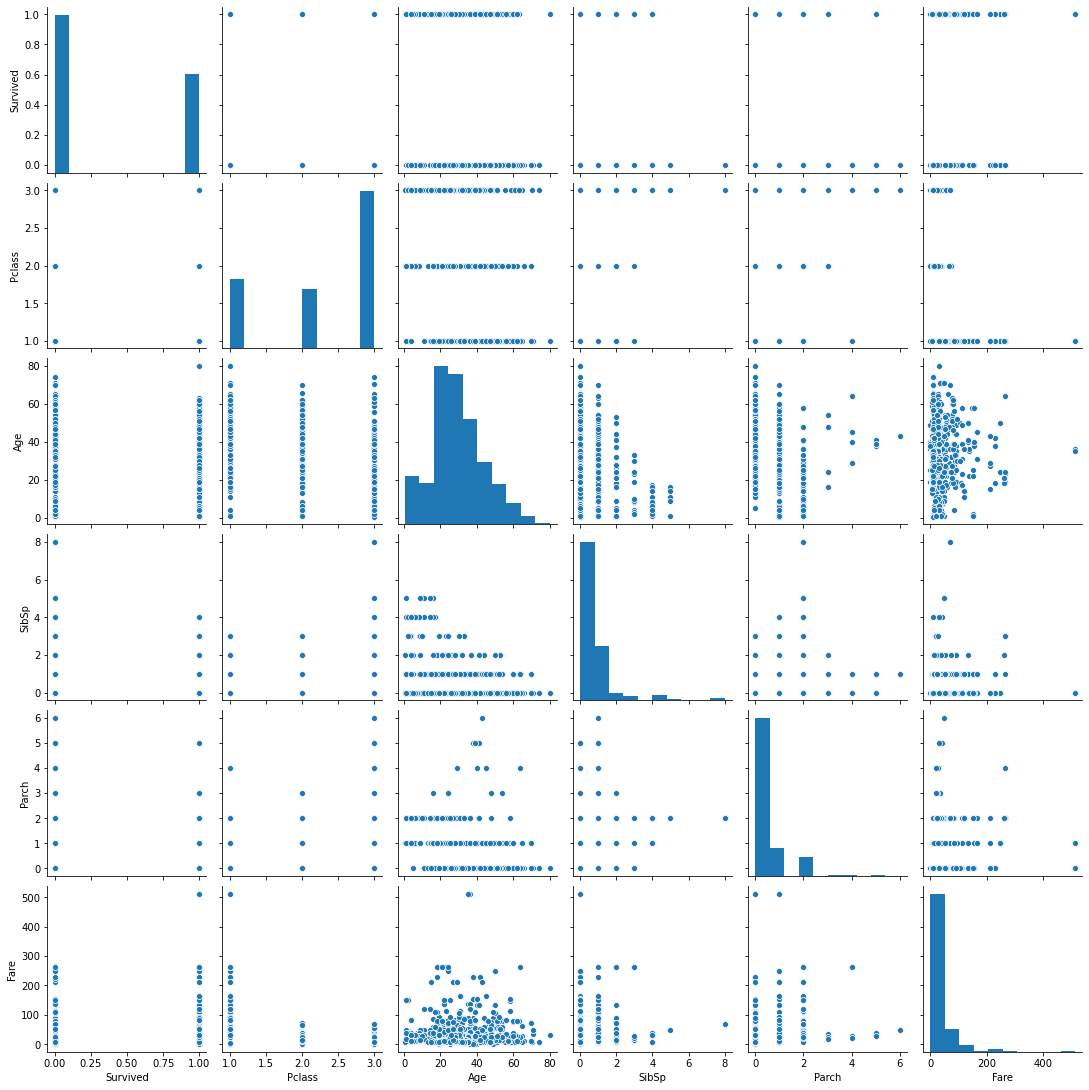

In [66]:
#General visualisation on training data

sns.pairplot(df_train)

From above, <br />
'Age' is fairly normally distributed, even amongst the ticket classes. There are more people between the ages of 16 and 40. <br />
Many more travellers were travelling alone. <br />
There are clearly more Male than Female, <br />
More people who died than those who survived. <br />
More people in 3rd class than the 1st and 2nd classes. <br />
And more people who embarked from Southampton than from the other two ports

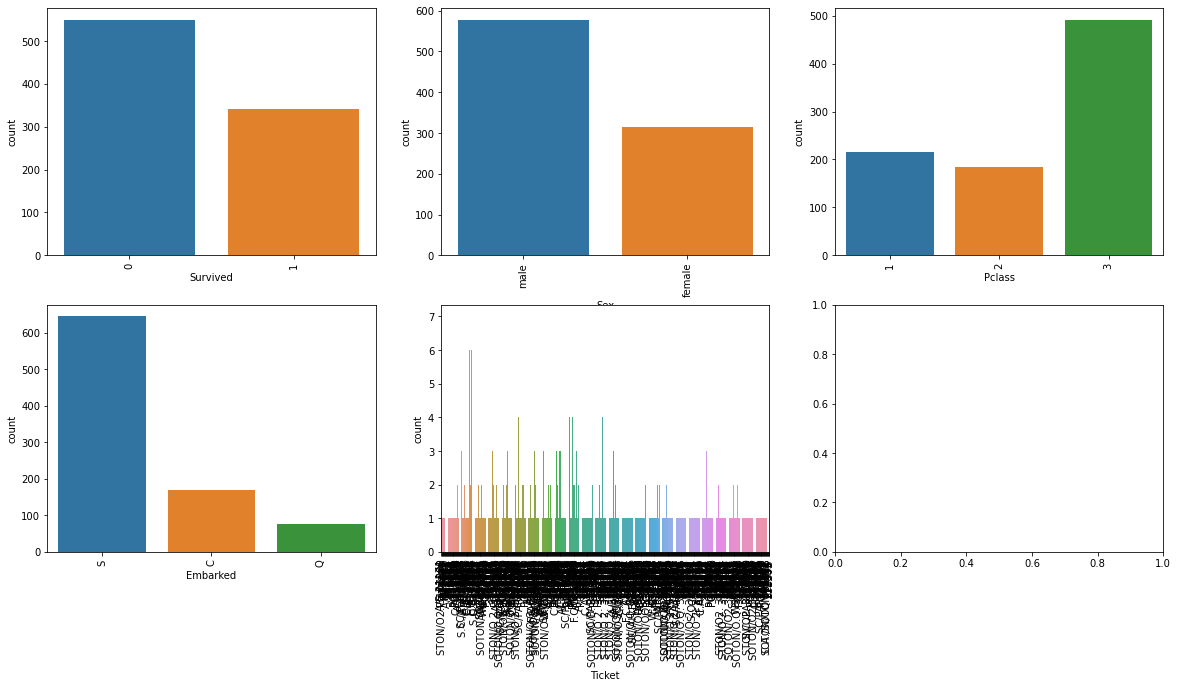

In [20]:
#categorical data visualisation

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(df_train_cat, ax.flatten()):
    sns.countplot(df_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
        
# ignore the bad visualisation of Ticket that has so many categories

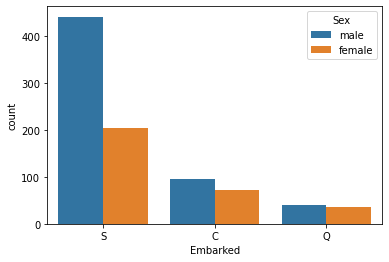

In [39]:
sns.countplot(data=df_train, x='Embarked', hue='Sex')

More people embarked from Southampton than from other ports <br />
There were more males than females aboard

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0386106650>,
      dtype=object)

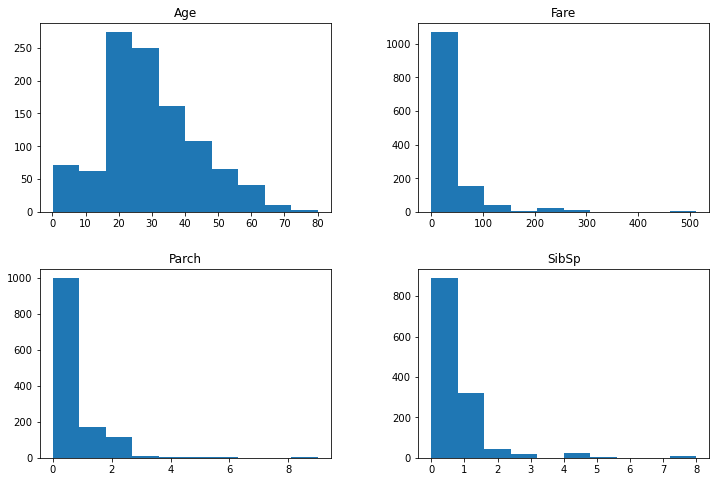

In [69]:
#see distribution for numerical data in full dataset

df_full_num.hist(grid=False, figsize=(12,8))

The distribution is very similar to that of the train data. There is clearly more training data than test data

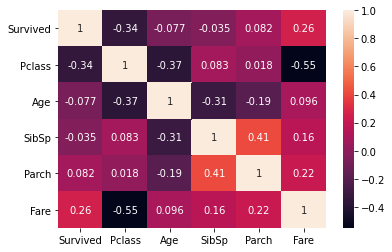

In [72]:
#Visualise correlation for train data

sns.heatmap(df_train.corr(), annot=True)

Pclass is negatively correlated with Survival rate <br />
Age is negatively correlated with Pclass, but not correlated with survival. <br />
Pclass is highly correlated with Fare. Fare is not highly correlated with survival rate, although, much better correlated than Age. <br />
SibSp is positively correlated with Parch

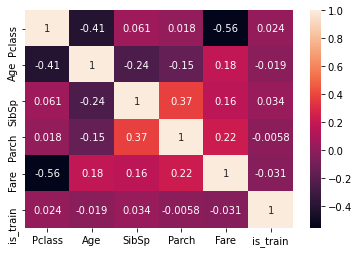

In [73]:
#Visualise correlation for full data

sns.heatmap(df_full.corr(), annot=True)

The full dataset has a similar correlation matrix

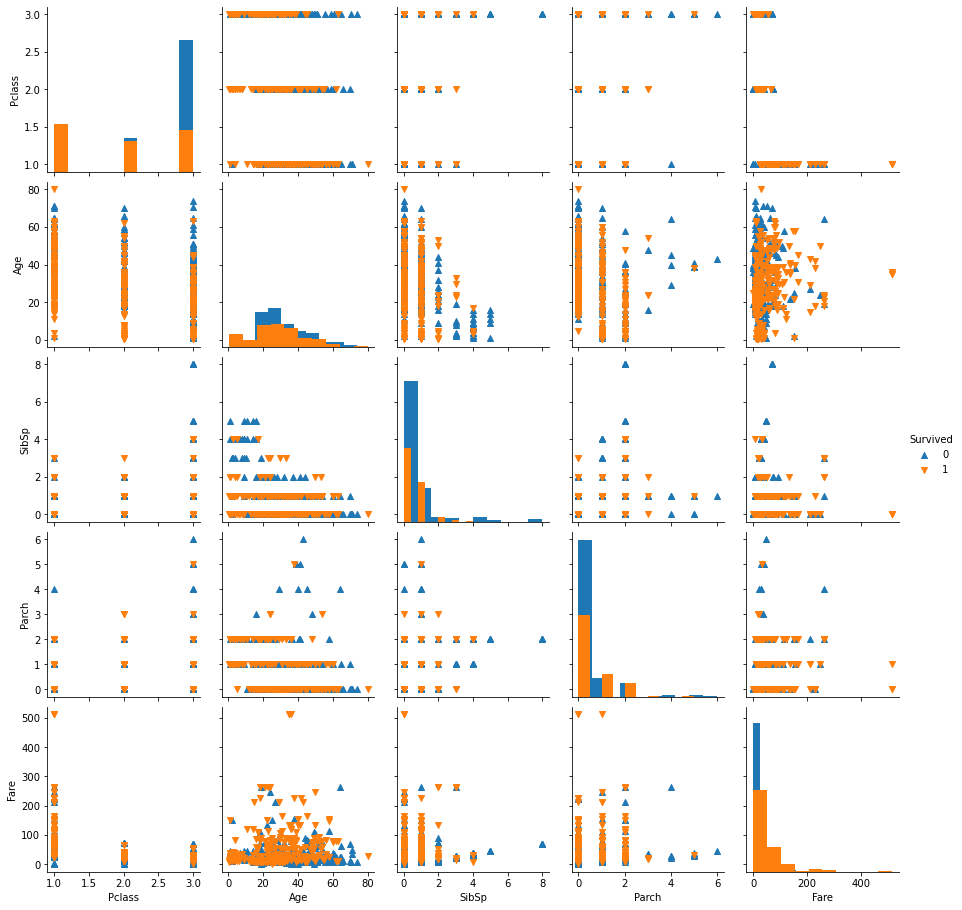

In [16]:
#visualise numeric features against survival

g = sns.PairGrid(df_train, hue='Survived', hue_kws={"marker": ["^", "v"]})
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

There is certainly need for feature engineering as there must be a hidden factor responsible for survival.

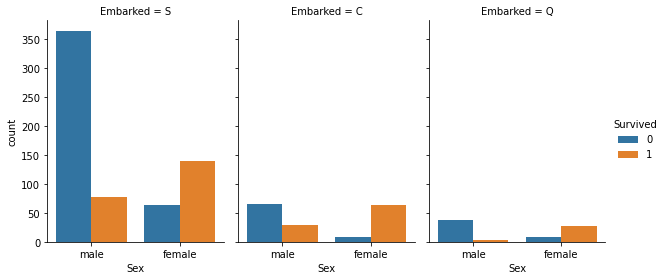

In [21]:
#visualise other features not captured above

sns.catplot(x='Sex', hue='Survived', col='Embarked',
                data=df_train, kind="count",
                height=4, aspect=.7);

In all, more females than males survived.  Conduct more analysis into sex

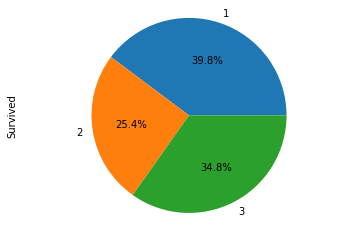

In [151]:
df_train.Survived.groupby(df_train.Pclass).sum().plot(kind='pie',  autopct='%1.1f%%')
plt.axis('equal')
plt.show()

The Piechart above shows that the higher the Pclass, the higher the chances of survival

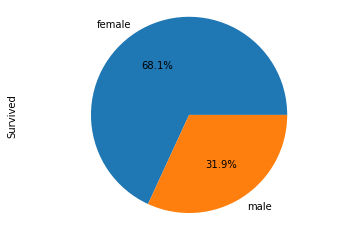

In [152]:
df_train.Survived.groupby(df_train.Sex).sum().plot(kind='pie',  autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Females had higher chances of survival than males, despite that the male population was higher

### My Hypotheses

1. No crew member survived <br />
2. Children had a better likelihood of surviving <br />
3. Women and children survived because of the ship's evacuation policy of women and children first <br />
4. In families with at least 1 grown male, women and/or children survived <br />
5. Generally, people and males from affluent families had higher chances of survival. Higher fare, and first class Olympic cabins especially, might have been offered a place on the life boats amongst all adults first  <br />
6. Women with accompanying male counterpart had higher chances of survival <br />
7. More men from the First Class would make it out than those from other classes <br />
8. 3rd Class people who stayed on deck during collision had a higher chance of surviving. I posit many were ondeck because of the small size of their cabins. <br />
9. Basically, the degree of closeness, between any two persons, is highly correlated to their chances of survival

#### Analyse, Re-engineer, and Visualise to confirm or rebuff hypotheses

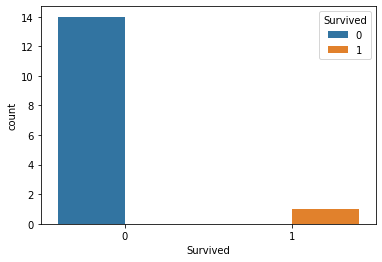

In [16]:
#Visualise survival based on fare (there are about 281 unique values on 'Fare')

#I would make an assumption that people on board who paid no fare are crew members

sns.countplot(x='Survived', hue='Survived', data=df_train[df_train['Fare']==0])

It shows only one of this group survived

In [15]:
#inspect rows with Fare = 0

df_train[df_train['Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S


### Feature Engineering

In [8]:
#create a new dataframe for feature engineering
df_train_eng = df_train.copy()

In [180]:
df_full_eng = df_full.copy()

In [9]:
#handle missing data

# fill missing values for Age with median, since outliers have little effect on median. 
df_train_eng['Age'].fillna(df_train_eng['Age'].median(),inplace=True)

# fill missing values for 'Embarked' with the mode
df_train_eng['Embarked'].fillna(df_train_eng['Embarked'].mode().iloc[0],inplace=True)

In [182]:
#handle missing data

# fill missing values for Age with median, since outliers have little effect on median. 
df_full_eng['Age'].fillna(df_full_eng['Age'].median(),inplace=True)

# fill missing values for 'Embarked' with the mode
df_full_eng['Embarked'].fillna(df_full_eng['Embarked'].mode().iloc[0],inplace=True)

In [10]:
#confirm treated missing values
df_train_eng.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [184]:
df_full_eng.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Embarked    0
is_train    0
dtype: int64

In [192]:
df_full_eng = df_full_eng.dropna()

In [193]:
df_full_eng.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
is_train    0
dtype: int64

In [11]:
#create a column for number of family on board
df_train_eng['NumFamily'] = df_train_eng['Parch'] + df_train_eng['SibSp']

In [194]:
#create a column for number of family on board
df_full_eng['NumFamily'] = df_full_eng['Parch'] + df_full_eng['SibSp']

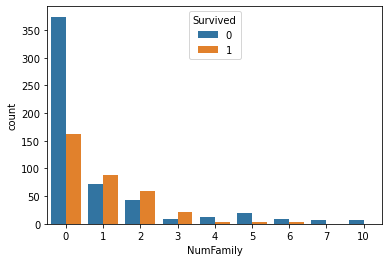

In [12]:
sns.countplot(x='NumFamily', hue='Survived', data=df_train_eng)

In [13]:
#attempt to reduce number of categories in Title by binning

df_train_eng.groupby(['NumFamily', 'Survived'])['Survived'].count().unstack()

Survived,0,1
NumFamily,,
0,374.0,163.0
1,72.0,89.0
2,43.0,59.0
3,8.0,21.0
4,12.0,3.0
5,19.0,3.0
6,8.0,4.0
7,6.0,NaN
10,7.0,NaN


In [30]:
df_train_eng['NumFamily'].dtype

dtype('int64')

In [14]:
#bin family based on the visualisation above

"""
where none - 0 = 0
      some - 1 = 1-3 family members
      many - 2 = 4-10 family members
"""
# create new column for mapping
df_train_eng['Family_Grouping'] = df_train_eng['NumFamily']

# create a dictionary for mapping
dict = {0 : 1, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 2, 8 : 3, 9 : 3, 10 : 3}
  
df_train_eng['Family_Grouping'] = df_train_eng['Family_Grouping'].map(dict) 
  
# Print the DataFrame after modification 
print(df_train_eng.head()) 

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  NumFamily  \
0    male  22.0      1      0         A/5 21171   7.2500        S          1   
1  female  38.0      1      0          PC 17599  71.2833        C          1   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S          0   
3  female  35.0      1      0            113803  53.1000        S          1   
4    male  35.0      0      0            373450   8.0500        S          0   

   Family_Grouping  
0                1  
1                1  
2          

In [195]:

# create new column for mapping
df_full_eng['Family_Grouping'] = df_full_eng['NumFamily']

# create a dictionary for mapping
dict = {0 : 1, 1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 2, 8 : 3, 9 : 3, 10 : 3}
  
df_full_eng['Family_Grouping'] = df_full_eng['Family_Grouping'].map(dict) 
  
# Print the DataFrame after modification 
print(df_full_eng.head()) 


   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Embarked  is_train  NumFamily  \
0      1      0         A/5 21171   7.2500        S         1          1   
1      1      0          PC 17599  71.2833        C         1          1   
2      0      0  STON/O2. 3101282   7.9250        S         1          0   
3      1      0            113803  53.1000        S         1          1   
4      0      0            373450   8.0500        S         1          0   

   Family_Grouping  
0                1  
1                1  
2          

In [37]:
#attempt to reduce number of categories in Title by binning

df_train_eng.groupby(['Family_Grouping', 'Survived'])['Survived'].count().unstack()

Survived,0,1
Family_Grouping,,
1,497.0,332.0
2,45.0,10.0
3,7.0,NaN


In [15]:
#create column to indicate if travelling alone or not
#df.query('year > 2012 | name == "Frank"')
"""
where alone - 0 
      accompanied - 1 
"""

df_train_eng['Companionship'] = np.where(((df_train_eng['Parch'] > 0) | (df_train_eng['SibSp'] > 0)), 1, 0)
df_train_eng.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0


In [196]:

df_full_eng['Companionship'] = np.where(((df_full_eng['Parch'] > 0) | (df_full_eng['SibSp'] > 0)), 1, 0)
df_full_eng.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train,NumFamily,Family_Grouping,Companionship
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,1,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,1,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0


In [16]:
#bin Age

"""
where kid - 0 = 0-17 yrs
      adult - 1 = 18-50 yrs
      elder - 2 = 51-100 yrs
"""

df_train_eng['Demography'] = pd.cut(x=df_train_eng['Age'], bins=[0, 17, 50, 100], labels=['0', '1', '2'])

In [197]:

df_full_eng['Demography'] = pd.cut(x=df_full_eng['Age'], bins=[0, 17, 50, 100], labels=['0', '1', '2'])

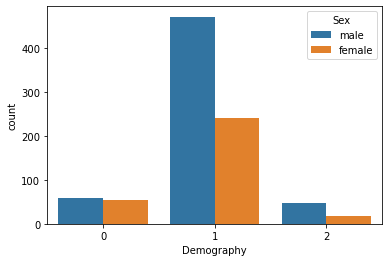

In [21]:
sns.countplot(x='Demography', hue='Sex', data=df_train_eng)

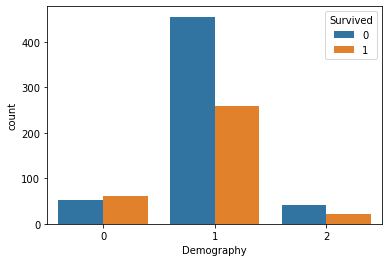

In [54]:
#Visualise second hypothesis of children having a higher chance of survival

sns.countplot(x='Demography', hue='Survived', data=df_train_eng)

#sns.catplot(x="Demography", hue="Survived", col="survived",
       #         data=titanic, kind="count",
          #      height=4, aspect=.7);

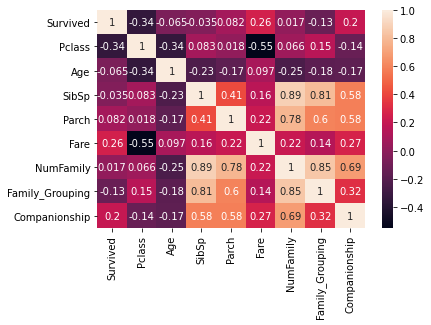

In [27]:
#Visualise correlation again for train data

sns.heatmap(df_train_eng.corr(), annot=True)

Companionship and Family_Grouping are correlated with each other. <br />
Companionship  however, is more highly correlated with survival than Family_Grouping. <br />
Family_Grouping will be dropped. <br />
SibSp and Parch are even better correlated to Survival than NumFamily. Consider dropping that too. <br />
Family_Grouping performs better than SibSp and Parch.

In [28]:
#Perform Name split to be able to test if title also matters beyond Sex

# I do not need the last names since we already have Parch and SibSp
split = df_train_eng.Name.str.split('[,.]',expand=True)

In [198]:

split_full = df_full_eng.Name.str.split('[,.]',expand=True)

In [29]:
split[1]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: 1, Length: 891, dtype: object

In [135]:
split[1].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [31]:
#make a separate Title column from the needed new data 
df_train_eng['Title'] = split[1]

In [199]:
df_full_eng['Title'] = split_full[1]

In [32]:
df_train_eng.tail(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title
876,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,S,0,1,0,1,Mr
877,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,S,0,1,0,1,Mr
878,0,3,"Laleff, Mr. Kristo",male,28.0,0,0,349217,7.8958,S,0,1,0,1,Mr
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,1,1,1,2,Mrs
880,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,1,1,1,1,Mrs
881,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,0,1,0,1,Mr
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,0,1,0,1,Miss
883,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,0,1,0,1,Mr
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,0,1,0,1,Mr
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,5,2,1,1,Mrs


In [46]:
df_train_eng['Title'].nunique()

17

In [67]:
df_train_eng.dtypes

Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Embarked             object
Family                int64
Family_Grouping       int64
travel_status         int64
Demography         category
Title                object
dtype: object

In [47]:
#attempt to reduce number of categories in Title by binning

# view data to aid mapping

df_train_eng.groupby(['Title', 'Sex'])['Title'].count().unstack()

Sex,female,male
Title,,
Capt,NaN,1.0
Col,NaN,2.0
Don,NaN,1.0
Dr,1.0,6.0
Jonkheer,NaN,1.0
Lady,1.0,NaN
Major,NaN,2.0
Master,NaN,40.0
Miss,182.0,NaN


Cherbourg is a French location, thus, some titles are French. These would be merged with their English counterparts

I would bin them into professional titles, normal titles like Mr. and Miss, and noble titles if any <br />
Considering this was around 1911, many people aboard the ship at least had some good means of livelihood. Certainly, no 'ordinary' person was aboard the Titanic.<br />

Mrs - Married female noble <br />
Mme - Married woman <br />

Miss - unmarried female <br />
Mlle - unmarried woman <br />
Ms - woman (maybe divorced in those days?) <br />

Mr - grown male <br />

Master - Male child <br />

Col - professional <br />
Capt - professional <br />
Major - professional <br />
Rev - professional <br />
Dr - professional <br />

Don - high nobility <br />
Lady - high nobility <br />
Sir - high nobility <br />
Countess - nobility <br />
Jonkheer - lowest nobility <br />

In [141]:
#bin Status

# create lists for binning Titles
noble = ['Lady', 'the Countess', 'Don', 'Sir', 'Jonkheer', 'Dona']
professional = ['Capt', 'Col', 'Dr', 'Major', 'Rev']
average_married_female =['Mrs', 'Mme']
average_male = ['Mr']
average_single_female = ['Miss', 'Mlle', 'Ms']
young_male = ['Master']

# create a copy of the Title column
df_train_eng['Status'] = df_train_eng['Title']

# replace values 
df_train_eng['Status'] = df_train_eng['Status'].replace(noble, 'Noble', regex = True)
df_train_eng['Status'] = df_train_eng['Status'].replace(professional, 'Professional', regex = True)
df_train_eng['Status'] = df_train_eng['Status'].replace(average_married_female, 'Average married female', regex = True)
df_train_eng['Status'] = df_train_eng['Status'].replace(average_single_female, 'Average single female', regex = True)
df_train_eng['Status'] = df_train_eng['Status'].replace(young_male, 'Young male', regex = True)
df_train_eng['Status'] = df_train_eng['Status'].replace(average_male, 'Average grown male', regex = True)

In [201]:
# create a copy of the Title column
df_full_eng['Status'] = df_full_eng['Title']

# replace values 
df_full_eng['Status'] = df_full_eng['Status'].replace(noble, 'Noble', regex = True)
df_full_eng['Status'] = df_full_eng['Status'].replace(professional, 'Professional', regex = True)
df_full_eng['Status'] = df_full_eng['Status'].replace(average_married_female, 'Average married female', regex = True)
df_full_eng['Status'] = df_full_eng['Status'].replace(average_single_female, 'Average single female', regex = True)
df_full_eng['Status'] = df_full_eng['Status'].replace(young_male, 'Young male', regex = True)
df_full_eng['Status'] = df_full_eng['Status'].replace(average_male, 'Average grown male', regex = True)

In [142]:
#bin societal rank

# further differentiate status grouping into ordinary and classed citizens based on the times
df_train_eng['SocietalRank'] = df_train_eng['Status']

# replace values 
ordinary = ['Average married female', 'Average single female', 'Young male', 'Average grown male'] # 0
special = ['Noble', 'Professional'] # 1

df_train_eng['SocietalRank'] = df_train_eng['SocietalRank'].replace(ordinary, 0, regex = True)
df_train_eng['SocietalRank'] = df_train_eng['SocietalRank'].replace(special, 1, regex = True)

In [202]:

# further differentiate status grouping into ordinary and classed citizens based on the times
df_full_eng['SocietalRank'] = df_full_eng['Status']

df_full_eng['SocietalRank'] = df_full_eng['SocietalRank'].replace(ordinary, 0, regex = True)
df_full_eng['SocietalRank'] = df_full_eng['SocietalRank'].replace(special, 1, regex = True)

In [103]:
df_train_eng.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid,TicketInt,Neighbours
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,S,1,1,1,1,Mr,Average grown male,0,1,521171,2662.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,1,1,1,1,Mrs,Average married female,0,1,17599,2.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,S,0,1,0,1,Miss,Average single female,0,1,23101282,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,1,1,Mrs,Average married female,0,1,113803,3.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,Mr,Average grown male,0,1,373450,828.0
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1,0,1,Mr,Average grown male,0,1,330877,6208.0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,0,2,Mr,Average grown male,0,1,17463,10.0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,2,1,0,Master,Young male,0,1,349909,0.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,1,1,1,Mrs,Average married female,0,1,347742,272.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,1,1,0,Mrs,Average married female,0,1,237736,0.0


#### Research

Ticket Prices for the Titanic when she sailed on her maiden voyage in 1912: <br />
First Class Suite- £870 or USD 4,350 <br />
First Class Berth- £30 or USD 150 <br />
Second Class- £12 or USD 60 <br />
Third Class- £3 to £8 or USD 40 <br />

(Wilkinson & Hamilton, 2011) <br /><br />


Investigate Fare

In [121]:
df_train_eng['Fare'].max()

512.3292

#Investigate true distribution of Fare

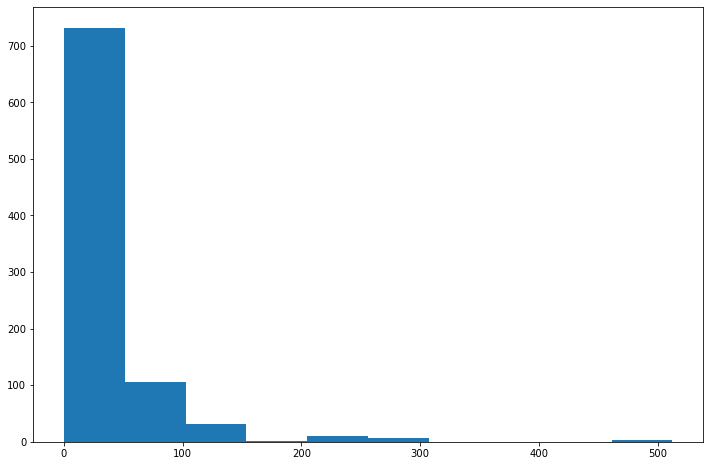

In [125]:
df_train_eng['Fare'].hist(grid=False, figsize=(12,8))

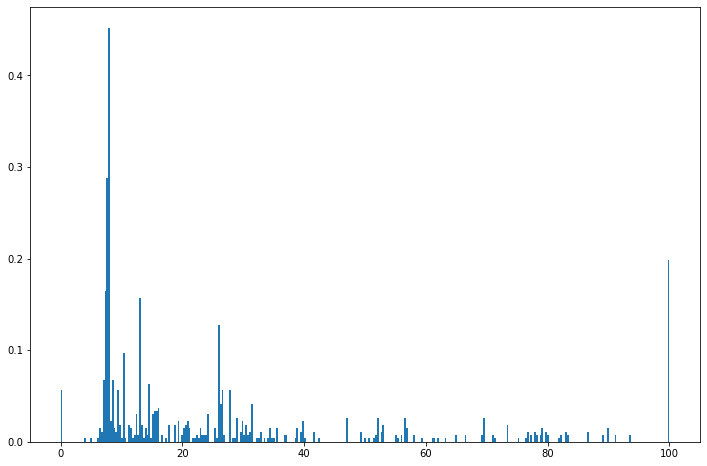

In [131]:
#visulaise without outliers

plt.figure(figsize=(12,8))
plt.hist(np.clip(df_train_eng['Fare'], 0, 100), bins=333, density=True)
plt.show()

In [124]:
#confirm proposed binning

df_train_eng[df_train_eng['Pclass']==3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_Grouping,travel_status,Demography,Title,Status
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,1,1,Mr,Average grown male
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1,Miss,Average single female
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,Mr,Average grown male
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1,0,1,Mr,Average grown male
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,2,1,0,Master,Young male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,0,1,0,1,Miss,Average single female
884,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,0,1,0,1,Mr,Average grown male
885,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,5,2,1,1,Mrs,Average married female
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,3,1,1,1,Miss,Average single female


In [139]:
#investigate Fare deeper 

df_train_eng.groupby(['Pclass', 'Demography'])['Fare'].describe()

count        mean        std      min        25%  \
Pclass Demography                                                     
1      0            12.0  108.079858  48.358105  39.4000  75.888525   
       1           165.0   87.381061  85.121422   0.0000  31.000000   
       2            39.0   63.143056  46.178424  26.0000  30.250000   
2      0            23.0   25.963226   9.195402  10.5000  19.125000   
       1           146.0   20.231592  14.199737   0.0000  13.000000   
       2            15.0   16.725000   8.202847  10.5000  11.425000   
3      0            78.0   20.946637  12.080135   7.0542   9.740625   
       1           403.0   12.415889  11.331136   0.0000   7.750000   
       2            10.0    7.725420   0.854581   6.2375   7.375000   

                         50%        75%       max  
Pclass Demography                                  
1      0           109.89165  127.88750  211.3375  
       1            57.00000  106.42500  512.3292  
       2            51.86250   78.26670  263.0000  
2      0            26.00000   31.53540   41.5792  
       1            13.00000   26.00000   73.5000  
       2            13.50000   19.50000   39.0000  
3      0            19.02290   30.73750   46.9000  
       1             7.92500   14.40000   69.5500  
       2             7.75000    7.98125    9.5875

I still posit that those who did not pay at all were crew members. Bin Fare according to above metrics <br />
Outliers are certainly affecting the metrics <br />
Is there a need to bin Fare if we already have Pclass? <br />
I would thus proceed to only class Fare to differentiate between those who paid and those who did not

In [36]:
#group Fare to whether a person paid or not

"""
where Yes - 1 
      No - 0 
"""
#df.query('year > 2012 | name == "Frank"')

df_train_eng['Paid'] = np.where((df_train_eng['Fare'] > 0), 1, 0)

In [203]:

df_full_eng['Paid'] = np.where((df_full_eng['Fare'] > 0), 1, 0)

In [37]:
df_train_eng.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,1,1,Mr,Average grown male,Ordinary,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,1,1,Mrs,Average married female,Ordinary,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1,Miss,Average single female,Ordinary,1


In [38]:
#inspect data to see if there is order to the tickets

df_train_eng.sort_values(by='Ticket', inplace=False, na_position='last')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid
504,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,S,0,1,0,0,Miss,Average single female,Ordinary,1
257,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,S,0,1,0,1,Miss,Average single female,Ordinary,1
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,S,0,1,0,1,the Countess,Noble,Special,1
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,S,2,1,1,2,Mr,Average grown male,Ordinary,1
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,S,2,1,1,1,Mrs,Average married female,Ordinary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,3,"Harknett, Miss. Alice Phoebe",female,28.0,0,0,W./C. 6609,7.550,S,0,1,0,1,Miss,Average single female,Ordinary,1
92,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,S,1,1,1,1,Mr,Average grown male,Ordinary,1
219,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,S,0,1,0,1,Mr,Average grown male,Ordinary,1
540,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,S,2,1,1,1,Miss,Average single female,Ordinary,1


The snippet above shows that similar ticket numbers, are most likely related to each other, and are from the same family. <br />
It could also mean that people with similar ticketing numbers were in similar cabins <br />
With Family binning already in place, would just attempt binning this to see if it adds any new pattern. <br />

The lifestyle of the 1900s posits that there were also governesses and caretakers aboard. the ticket numbers would be helping in identifying those who travelled together.

In [102]:
#confirm assumption

df_train_eng[df_train_eng['Companionship']==1].sort_values(by='Ticket', inplace=False, na_position='last')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Family_Grouping,travel_status,Demography,Title,Status
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,S,2,1,1,2,Mr,Average grown male
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,S,2,1,1,1,Mrs,Average married female
585,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,S,2,1,1,1,Miss,Average single female
366,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C,1,1,1,2,Mrs,Average married female
329,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,C,1,1,1,0,Miss,Average single female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,S,4,2,1,1,Mrs,Average married female
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S,4,2,1,0,Mr,Average grown male
92,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S,1,1,1,1,Mr,Average grown male
540,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,S,2,1,1,1,Miss,Average single female


Another option to group families together would be to use their last name

In [39]:
#check if ticketing informs class

df_train_eng[df_train_eng['Ticket'].str.contains('W./C.')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,S,4,2,1,0,Mr,Average grown male,Ordinary,1
147,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,S,4,2,1,0,Miss,Average single female,Ordinary,1
235,0,3,"Harknett, Miss. Alice Phoebe",female,28.0,0,0,W./C. 6609,7.550,S,0,1,0,1,Miss,Average single female,Ordinary,1
242,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.500,S,0,1,0,1,Mr,Average grown male,Ordinary,1
436,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,S,4,2,1,1,Miss,Average single female,Ordinary,1
526,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.500,S,0,1,0,1,Miss,Average single female,Ordinary,1
736,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,S,4,2,1,1,Mrs,Average married female,Ordinary,1
783,0,3,"Johnston, Mr. Andrew G",male,28.0,1,2,W./C. 6607,23.450,S,3,1,1,1,Mr,Average grown male,Ordinary,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.450,S,3,1,1,1,Miss,Average single female,Ordinary,1


In [40]:
df_train_eng[df_train_eng['Ticket'].str.contains('WE/P')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid
540,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,S,2,1,1,1,Miss,Average single female,Ordinary,1
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,S,2,1,1,2,Capt,Professional,Special,1


This shows that the test data does contain some information. If I use the training data alone to group families, would that have an averse effect? 

In [41]:
#strip the letters from the numbers in Ticket

df_train_eng['Ticket'] = df_train_eng['Ticket'].str.replace(r'[^0-9]+', '')
df_train_eng.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,S,1,1,1,1,Mr,Average grown male,Ordinary,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,1,1,1,1,Mrs,Average married female,Ordinary,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,S,0,1,0,1,Miss,Average single female,Ordinary,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,1,1,Mrs,Average married female,Ordinary,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,Mr,Average grown male,Ordinary,1


In [204]:

df_full_eng['Ticket'] = df_full_eng['Ticket'].str.replace(r'[^0-9]+', '')

In [42]:
df_train_eng['Ticket'].nunique()

679

In [78]:
df_train_eng[(df_train_eng['Ticket'].notnull()) & (df_train_eng['Ticket']!=u'')].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
           dtype='int64', length=887)

length is different from dataframe shape. This shows that the stripping caused some empty columns

In [97]:
#replace any nan ticket with ticket number 1

df_train_eng['Ticket'] = df_train_eng['Ticket'].replace('', 1) 

In [205]:

df_full_eng['Ticket'] = df_full_eng['Ticket'].replace('', 1) 

In [98]:
#convert from float to integer
df_train_eng['TicketInt'] = df_train_eng['Ticket'].astype(int)

In [206]:
df_full_eng['TicketInt'] = df_full_eng['Ticket'].astype(int)

In [100]:
#compute neighbours

# sort the values 
df_train_eng = df_train_eng.sort_values(['TicketInt'])

# compute difference
df_train_eng['Neighbours'] = df_train_eng['TicketInt'].diff()

# reorder index
df_train_eng = df_train_eng.sort_index()
df_train_eng.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid,TicketInt,Neighbours
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,521171,7.2500,S,1,1,1,1,Mr,Average grown male,Ordinary,1,521171,2662.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,1,1,1,1,Mrs,Average married female,Ordinary,1,17599,2.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,23101282,7.9250,S,0,1,0,1,Miss,Average single female,Ordinary,1,23101282,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,1,1,Mrs,Average married female,Ordinary,1,113803,3.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,Mr,Average grown male,Ordinary,1,373450,828.0


In [207]:

# sort the values 
df_full_eng = df_full_eng.sort_values(['TicketInt'])

# compute difference
df_full_eng['Neighbours'] = df_full_eng['TicketInt'].diff()

# reorder index
df_full_eng = df_full_eng.sort_index()

#### Final checks on data

In [109]:
#map Embarked to integer values

# define dictionary
dic = {'S': 0, 'C': 1, 'Q': 2}

# replace existing values with new 
df_train_eng = df_train_eng.replace({'Embarked': dic})

In [208]:

df_full_eng = df_full_eng.replace({'Embarked': dic})

In [117]:
#map Sex into integer values

dic_sex = {'male': 0, 'female': 1}

# replace existing values with new 
df_train_eng = df_train_eng.replace({'Sex': dic_sex})

# define dictionary

In [209]:

# replace existing values with new 
df_full_eng = df_full_eng.replace({'Sex': dic_sex})

In [118]:
df_train_eng.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid,TicketInt,Neighbours
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,521171,7.2500,0,1,1,1,1,Mr,Average grown male,0,1,521171,2662.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,17599,71.2833,1,1,1,1,1,Mrs,Average married female,0,1,17599,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,23101282,7.9250,0,0,1,0,1,Miss,Average single female,0,1,23101282,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,1,1,1,Mrs,Average married female,0,1,113803,3.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,1,Mr,Average grown male,0,1,373450,828.0


In [143]:
df_train_eng.isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
NumFamily          0
Family_Grouping    0
Companionship      0
Demography         0
Title              0
Status             0
SocietalRank       0
Paid               0
TicketInt          0
Neighbours         0
dtype: int64

In [210]:
df_full_eng.isnull().sum()

Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
is_train           0
NumFamily          0
Family_Grouping    0
Companionship      0
Demography         0
Title              0
Status             0
SocietalRank       0
Paid               0
TicketInt          0
Neighbours         1
dtype: int64

In [138]:
df_train_eng['Neighbours'] = df_train_eng['Neighbours'].replace(np.nan, 0) 

In [211]:
df_full_eng['Neighbours'] = df_full_eng['Neighbours'].replace(np.nan, 0) 

In [139]:
df_train_eng.isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
NumFamily          0
Family_Grouping    0
Companionship      0
Demography         0
Title              0
Status             0
SocietalRank       0
Paid               0
TicketInt          0
Neighbours         0
dtype: int64

In [148]:
trials = df_train_eng.copy()

### Describe new features

*Status* - Who is the passenger in society? - Nominal <br /> 

*Societal Rank* - Ordinary citizen, or has some social status - Special? <br />
       -> Ordinary - 0 <br />
       ->Special - 1 <br />

*Title* - What title does the passenger carry? - Nominal <br /> 

*Demography* - To what demography does the passenger belong? - Ordinal <br /> 
     -> kid - 0 = 0-17 yrs <br />
     -> adult - 1 = 18-50 yrs <br />
     -> elder - 2 = 50 above <br />
     
*NumFamily* - How many blood family does the passenger have with him / her ?  - Integer quantitative <br /> 

*Family_Grouping* - how much family is the passeneger traveling with? -Ordinal <br /> 
      ->none - 0 = 0 <br />
      -> some - 1 = 1-3 family <br />
      -> many - 2 = 4-10 family <br />

*Companionship* - Is the passenger travelling with close blood ties or alone? -Nominal Binary <br /> 
      -> alone - 0 <br />
      -> accompanied - 1 <br />
      
 *Paid* - did a person aboard the ship pay a fare or not? - nominal <br />
        -> Yes - 1 <br />
        -> No - 0 

In [119]:
df_train_eng.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid,TicketInt,Neighbours
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,521171,7.25,0,1,1,1,1,Mr,Average grown male,0,1,521171,2662.0


In [212]:
df_full_eng.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_train,NumFamily,Family_Grouping,Companionship,Demography,Title,Status,SocietalRank,Paid,TicketInt,Neighbours
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,521171,7.25,0,1,1,1,1,1,Mr,Average grown male,0,1,521171,2662.0


## Machine Learning
ref: https://www.kaggle.com/vikash1a2b3c/transaction-prediction-using-catboost-and-kfold <br />
https://effectiveml.com/using-grid-search-to-optimise-catboost-parameters.html <br />
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Feature Selection

Catboost, kfolds, and everything nice

In [149]:
#import libraries and modules

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

In [213]:
#store passenger Ids

train_id = real_train.PassengerId
test_id = real_test.PassengerId

In [214]:
#split training and test sets

train = df_full_eng[df_full_eng['is_train'] == 1]
test = df_full_eng[df_full_eng['is_train'] == 0]

In [216]:
#read in training and test X and y values
redundant = ['Name', 'Age', 'Ticket', 'Title', 'Status', 'is_train']

# drop all unneeded features 
train = train.drop(redundant, axis=1) # input variables training and validation
test = test.drop(redundant, axis=1) 

target_cat = real_train['Survived'].astype('category')  # dependent variable
target_int = real_train['Survived']

In [217]:
#convert categorical columns to integers

train_int = train.astype(int)
test_int = test.astype(int)

In [147]:
train.dtypes

Pclass             int64
Sex                int64
SibSp              int64
Parch              int64
Fare               int64
Embarked           int64
NumFamily          int64
Family_Grouping    int64
Companionship      int64
Demography         int64
SocietalRank       int64
Paid               int64
TicketInt          int64
Neighbours         int64
dtype: object

In [218]:
#scale features

sc_X = StandardScaler()
test_int_sc_x = sc_X.fit_transform(test_int)


In [ ]:
#attempt ensemble with kfold

In [227]:
#kfold cross validation
def f(train_int,test_int_sc_x,classifier_filename,n):
    for i in n:
        
        print(classifier_filename[1][i])
        
    
        n_split = 8
        kf = KFold(n_splits=n_split, random_state=42, shuffle=True)
    
        y_valid_pred = 0 * target_int
        y_test_pred = 0


        for idx, (train_index, valid_index) in enumerate(kf.split(train_int)):
            y_train, y_valid = target_int.iloc[train_index], target_int.iloc[valid_index]
            X_train, X_valid = train_int.iloc[train_index,:], train_int.iloc[valid_index,:]
            X_train = sc_X.transform(X_train)
            X_valid = sc_X.transform(X_valid)
            '''_train = Pool(X_train, label=y_train)
            _valid = Pool(X_valid, label=y_valid)'''
            
            print( "\nFold ", idx)
            
            # for catboost
            if(classifier_filename[1][i]=="CatBoostClassifier.csv"):

                classifier_filename[0][i].fit(X_train,y_train,eval_set = (X_valid,y_valid), use_best_model=True, verbose=500)
            else:
                classifier_filename[0][i].fit(X_train,y_train)
                
                y_pred = classifier_filename[0][i].predict(X_valid)
        
            # making the Confusion Matrix
            cm = confusion_matrix(y_valid, y_pred)
            print("cm=%s" %cm)
        
            # accuracy_score
            score = accuracy_score(y_valid,y_pred)
            print("score=%.4g"%score)
            
            # roc_score
            roc = roc_auc_score(y_valid,classifier_filename[0][i].predict_proba(X_valid)[:,1])
            print("roc=%.4g"%roc)
            
            # classification_report
            cr = classification_report(y_valid,y_pred)
            print("cr=%s"%cr)
        
            y_test_pred += classifier_filename[0][i].predict_proba(test_int_sc_x)[:,1]
            
        
    
        y_test_pred = y_test_pred/n_split
        '''
        for i in range(0,200000):
            y_test_pred_1.append(int(y_test_pred[i]/5))
        '''
    
        submission = pd.DataFrame()
        submission['PassengerId'] = test_id
        submission['Survived'] = y_test_pred
        submission.to_csv(classifier_filename[1][i],index=False)


In [220]:
#boosting model

boosting_classifier_filename = []
boosting_classifier = []
filename = []

In [221]:
#adaBoost

dt = DecisionTreeClassifier() # base model

boosting_classifier.append(AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1.0))
filename.append('AdaBoostClassifier.csv')

In [222]:
#gradientboost

boosting_classifier.append(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1))
#clf.fit(X_train, y_train)
filename.append('GradientBoostingClassifier.csv')

In [223]:
#xgboost

boosting_classifier.append(XGBClassifier(learning_rate =0.1, 
                                         n_estimators=100, 
                                         max_depth=3, 
                                         min_child_weight=1, 
                                         gamma=0, 
                                         subsample=1, 
                                         colsample_bytree=1,
                                         objective='binary:logistic',
                                         nthread=None,
                                         scale_pos_weight=1,
                                         seed=27))
filename.append('XGBClassifier.csv')

In [224]:
#catboost

boosting_classifier.append(CatBoostClassifier(loss_function='Logloss',
                                              eval_metric='AUC',
                                              task_type='GPU',
                                              learning_rate=0.008,
                                              iterations=14000,
                                              random_seed=42,
                                              od_type="Iter",
                                              depth=10,
                                              early_stopping_rounds=500))
filename.append('CatBoostClassifier.csv')


In [228]:
boosting_classifier_filename.append(boosting_classifier)
boosting_classifier_filename.append(filename)

# call kfold fuunction
f(train_int,test_int_sc_x,boosting_classifier_filename,n=[3])

CatBoostClassifier.csv

Fold  0


CatBoostError: catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

### Other Algorithms

In [167]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [168]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(train, target)
print(X_selected.shape)

(891, 2)


In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [169]:
X_selected

array([[3, 0],
       [1, 1],
       [3, 1],
       ...,
       [3, 1],
       [1, 0],
       [3, 0]])

##### Logistic Regression

ref: https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
seed = 45

In [176]:
# pandas to numpy
X_train = train.values
y_train = target.values.reshape((1,target.shape[0]))
#X_test = X_test.values
#Y_test = Y_test.values.reshape((1,Y_test.shape[0]))
    

In [230]:
# One hot encoding

def OHE(df1,df2):
    #cat_col = column

    len_df1 = df1.shape[0]
    
    df = df_full_eng.copy()
    
    cat_col = df1.columns
    c2,c3 = [],{}
    
    print('Categorical feature',len(cat_col))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [231]:
train_ohe,test_ohe = OHE(train,test)

Categorical feature 14
Train (891, 1505)
Test (417, 1505)


In [232]:
df_full_eng.nunique()

Pclass                3
Name               1306
Sex                   2
Age                  97
SibSp                 7
Parch                 8
Ticket              923
Fare                281
Embarked              3
is_train              2
NumFamily             9
Family_Grouping       3
Companionship         2
Demography            3
Title                18
Status                7
SocietalRank          2
Paid                  2
TicketInt           923
Neighbours          265
dtype: int64

In [ ]:
le = LabelEncoder()
#col =['Sex', 'SocietalRank', '']
train1['Sex'] = le.fit_transform(train1['Sex'])
test1['Sex'] = le.fit_transform(test1['Sex'])

In [ ]:
train_ohe['Sex'] = le.fit_transform(train1['Sex'])
test_ohe['Sex'] = le.fit_transform(test1['Sex'])

In [ ]:
train1['Survived'].astype('category')

In [179]:
logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
#grid search 

def model_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['ctr_border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        print(res,prms,s'best:',ps.bestscore(),ps.bestparam())
    return ps.bestparam()

bestparams = catboost_param_tune(params,train_set,train_label,cat_dims)

In [ ]:
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [ ]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 
                     'C': [1, 10, 100, 1000]}
                   ]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

In [ ]:
# this function does 3-fold crossvalidation with catboostclassifier          
def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_set):
        train = train_set.iloc[train_index,:]
        test = train_set.iloc[test_index,:]

        labels = train_label.ix[train_index]
        test_labels = train_label.ix[test_index]

        clf = cb.CatBoostClassifier(**params)
        clf.fit(train, np.ravel(labels), cat_features=cat_dims)

        res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
    return np.mean(res)

In [ ]:
data = pd.read_csv("D://Blogs//train.csv")
X = data.iloc[:,0:20]  # independent columns
y = data.iloc[:,-1]    # target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()